# Naive Bayes

El estimador ingenuo bayesiano parte del Teorema de Bayes

$$P(Y | X) = \frac{ P(X | Y) \cdot P(Y) }{ P(X) } \qquad \qquad \text{Sujeto a} \quad P(X)>0$$

Donde $P(X | Y)$ es la verosimilitud, $P(Y)$ es la probabilidad a priori y $P(X)$ es una constante de proporcionalidad.


### Supuestos

1. Independencia de las variables

2. Distribución asignada al conjunto de covariables

A continuación se presenta un ejemplo en Jupyter Notebook

### Bibliotecas

In [2]:
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas
import warnings

from   sklearn.naive_bayes   import GaussianNB         # Clasificador Gausiano de Naive Bayes (datos continuos)
from   sklearn.naive_bayes   import MultinomialNB      # Clasificador Multinomial de Naive Bayes (datos discretos)
from   sklearn.metrics       import accuracy_score     # Función para calcular la precisión de clasificación
from   sklearn.metrics       import confusion_matrix   # Función para calcular una matriz de confusión
from   sklearn.preprocessing import LabelEncoder       # Codificador para cambiar datos categoricas a numéricos discretos

warnings.filterwarnings("ignore")
# https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/
# https://www.geeksforgeeks.org/naive-bayes-classifiers/

### Ejemplo :: Social Network Ads

In [3]:
# Se carga el datasets de iris
datos_iris = pd.read_csv("Social_Network_Ads.csv")
datos_iris.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
# Generamos nuestra matriz de diseño y nuestro vector de y
matriz_diseño = datos_iris.values[:,[2,3]]
y_real        = datos_iris.values[:,   4]
y_real_cat    = np.array([ "SI" if x==1 else "NO" for x in y_real ])
y_real_color  = np.array([ "orange" if x=="SI" else "green" for x in y_real_cat ])
print("Matriz de diseño:")
print( matriz_diseño[0:5,:] )
print("")
print("Y real:")
print( y_real[0:5] )

Matriz de diseño:
[[19 19000]
 [35 20000]
 [26 43000]
 [27 57000]
 [19 76000]]

Y real:
[0 0 0 0 0]


### Grafica de nuestros datos

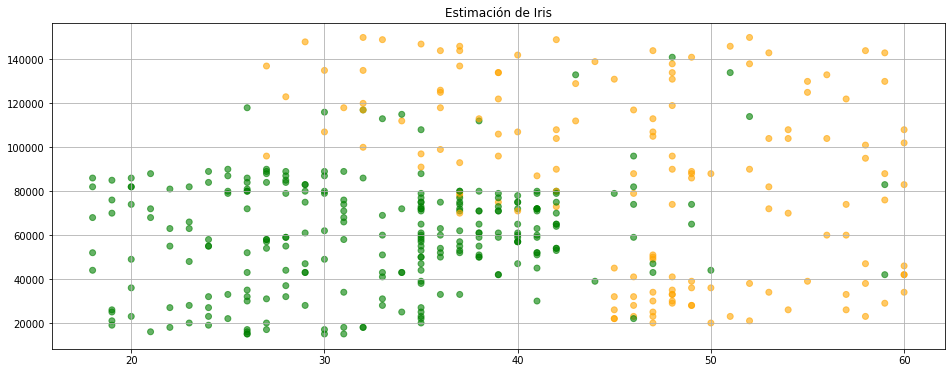

In [6]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Estimación de Iris")
plt.scatter( x=matriz_diseño[:,0], y=matriz_diseño[:,1], c=y_real_color, label="Puntos", alpha = 0.6)
plt.grid()
plt.show()

<div class="alert alert-warning">
    <b>NOTA::</b> Notemos que ambas variables <b>Age</b> y <b>Salary</b> no son independientes.
    Sin embargo, utilizamos el clasificador por propósitos educativos.
</div>

### Creación del modelo

In [8]:
# Generamos nuestro modelo y lo ajustamos
modelo_nb = GaussianNB().fit( matriz_diseño, y_real_cat )
modelo_nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
# Estimamos nuestra clasificación
y_estimada = modelo_nb.predict( matriz_diseño )
y_estimada[0:10]

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO'],
      dtype='<U2')

### Métricas del modelo

In [11]:
# Creamos nuestra matriz de confusión
matriz_confusion = confusion_matrix( y_real_cat, y_estimada )
matriz_confusion

array([[239,  18],
       [ 25, 118]], dtype=int64)

In [13]:
# Calculamos la precisión del modelo
print( "Precision del modelo = " + str( np.round( accuracy_score( y_real_cat, y_estimada ) * 100, 2 ) ) + "%" )

Precision del modelo = 89.25%


### Gráfica del modelo

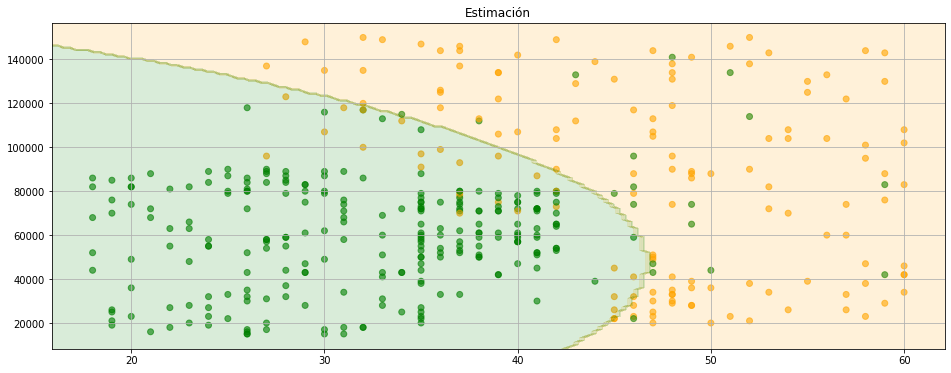

In [61]:
# Graficamos nuestros puntos
plt.subplots( nrows = 1, ncols = 1, figsize=(16,6) )
plt.title("Estimación")
# Graficamos los puntos
plt.scatter( x=matriz_diseño[:,0], y=matriz_diseño[:,1], c=y_real_color, label="Puntos", alpha = 0.6)
# Obtenemos los limites de la grafica actual para poder calcular Z
XX1, XX2  = np.meshgrid( np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 150 ),
                         np.linspace(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 150 ) )
YY        = modelo_nb.predict( np.vstack( [XX1.ravel(), XX2.ravel()] ).T )
YY        = np.array([ 1 if x=="SI" else 2 for x in YY ]).reshape( XX1.shape ) 
# Graficamos el fondo para identificar la clase
plt.contourf(XX1, XX2, YY,  colors=["orange","green"], alpha=0.15 )
plt.grid()
plt.show()
